In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import triang

In [2]:
#grid
N = 500
L = 2
x = np.linspace(0,L,N+1)
Delta_x = x[1]-x[0]

#constants 
hbar = 1
m =1

In [3]:
def integral(f, axis= 0):
    return np.sum(f*Delta_x, axis=axis)
    

In [4]:
#initial state
def Psi0(x):
    triangle = triang(len(x))
    A = integral(triangle**2)
    return triangle/np.sqrt(A)

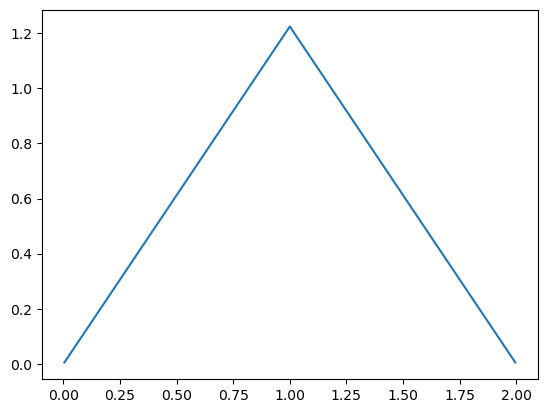

In [5]:
plt.plot(x[1:-1], Psi0(x[1:-1]))

In [6]:
#Hamiltonian 
H = -hbar**2/(2*m) *1/(Delta_x)**2 * (np.diag(-2*np.ones(N-1))+ np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1))
print(H)

#diagonalise
E,psi = np.linalg.eigh(H)

#normalise
norm = integral(psi.T**2)

psi = psi.T/np.sqrt(norm)

[[ 62500. -31250.     -0. ...     -0.     -0.     -0.]
 [-31250.  62500. -31250. ...     -0.     -0.     -0.]
 [    -0. -31250.  62500. ...     -0.     -0.     -0.]
 ...
 [    -0.     -0.     -0. ...  62500. -31250.     -0.]
 [    -0.     -0.     -0. ... -31250.  62500. -31250.]
 [    -0.     -0.     -0. ...     -0. -31250.  62500.]]


In [7]:
c = []

for n in range(N-1):
    
    c.append( integral( Psi0(x[1:-1])* psi[n]))
    
c = np.array(c)

np.linalg.norm(c)

1.0000000000000004

In [8]:
def Psi(t):
    
    return psi.T@(c*np.exp(-1j * E*t/hbar))

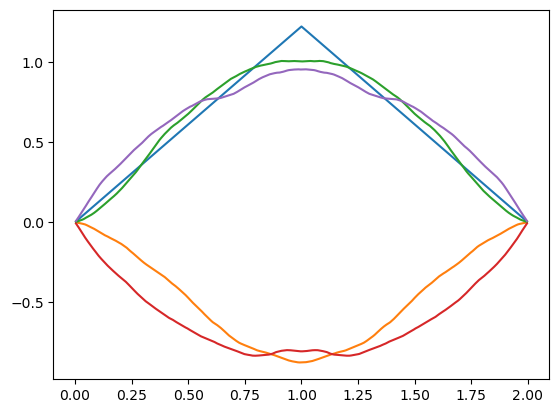

In [9]:
plt.plot(x[1:-1], np.real(Psi(0)))
plt.plot(x[1:-1], np.real(Psi(2)))
plt.plot(x[1:-1], np.real(Psi(5)))
plt.plot(x[1:-1], np.real(Psi(8)))
plt.plot(x[1:-1], np.real(Psi(10)))

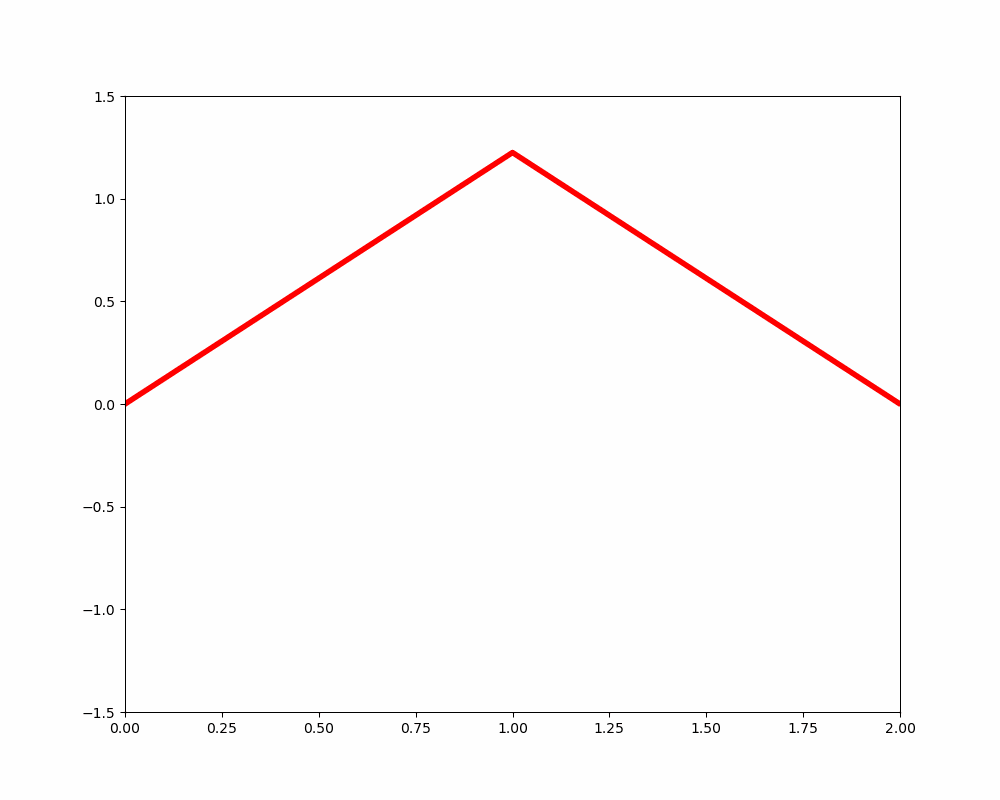

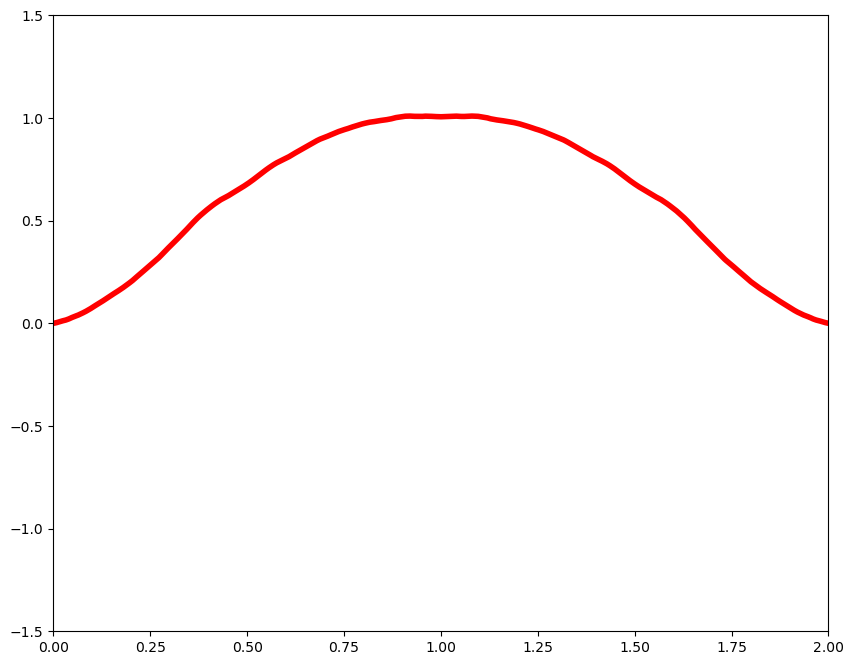

In [10]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize = (10,8))
ax = plt.axes(xlim=[0,L],ylim=[-1.5,1.5])

line, = ax.plot(x[1:-1],np.zeros(N-1),lw=4,color="red")

def animate(t):
    
    y = np.real(Psi(t))
    line.set_data(x[1:-1],y)  
    
    return (line,)


def init():
    line.set_data([],[])            
    return (line,)

ani = FuncAnimation(fig, animate, np.linspace(0.,5,350), init_func=init,
                              interval=100, blit=True)
from matplotlib.animation import PillowWriter
ani.save("animation.gif", writer=PillowWriter(fps=60))
from IPython.display import Image
Image(filename="animation.gif")